In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

np.random.seed(1234567890)
n_estimators=100

df = pd.read_csv('titanic.csv')

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#переводим категориальные признаки в бинарные
df = df.join(pd.get_dummies(df['sex'], prefix = 'sex',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['embarked'], prefix = 'embarked',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['class'], prefix = 'class',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['who'], prefix = 'who',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['deck'], prefix = 'deck',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['embark_town'], prefix = 'embark_town',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['adult_male'], prefix = 'eadult_male',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['alive'], prefix = 'alive',  prefix_sep='_'), how = 'outer')
df = df.join(pd.get_dummies(df['alone'], prefix = 'alone',  prefix_sep='_'), how = 'outer')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,eadult_male_False,eadult_male_True,alive_no,alive_yes,alone_False,alone_True
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,0,0,0,1,0,1,1,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0,1,0,0,1,0,0,1,1,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,0,0,0,1,1,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,0,0,0,1,1,0,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,0,0,0,1,0,1,1,0,0,1


In [3]:
#удаляем столбцы с категориальными признаками
df = df.drop(['sex'],1)
df = df.drop(['embarked'],1)
df = df.drop(['class'],1)
df = df.drop(['who'],1)
df = df.drop(['deck'],1)
df = df.drop(['embark_town'],1)
df = df.drop(['alive'],1)
df = df.drop(['alone'],1)
df = df.drop(['adult_male'],1)

In [4]:

variables = ['pclass', 'age', 'sibsp', 'parch', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'eadult_male_False', 'eadult_male_True',
       'alone_False', 'alone_True', 'fare']
for variable in variables:
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
subset = df[variables].dropna()
print(subset.shape)

(714, 30)


In [5]:
subset['survived'] = df['survived'].astype('category')
predictors = subset[variables]
targets = subset['survived']

In [7]:
training_data, test_data, training_target, test_target  = train_test_split(predictors, targets, test_size=.3)

In [8]:
from sklearn.linear_model import LassoLarsCV

In [9]:
model=LassoLarsCV(cv=10, precompute=False).fit(training_data, training_target)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.810e-03, with an active set of 8 regressors, and the smallest cholesky pivot element being 5.576e-08
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=9.882e-04, with an active set of 12 regressors, and the smallest cholesky pivot element being 5.576e-08
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=9.882e-04, with an active set of 12 regressors, and the smallest cholesky pivot element being 4.942e-08
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/line

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=6.577e-04, with an active set of 14 regressors, and the smallest cholesky pivot element being 7.955e-08
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=6.577e-04, with an active set of 14 regressors, and the smallest cholesky pivot element being 5.576e-08
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=6.577e-04, with an active set of 14 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/li

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.336e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 6.234e-08
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.914e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.914e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 8.162e-08
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_m

In [10]:
# print variable names and regression coefficients
feature_name = list(predictors.columns.values)
feature_coefficient = list(model.coef_)
features = pd.DataFrame({'Variable':feature_name, 'Regression Coefficients':feature_coefficient}).sort_values(by='Regression Coefficients', ascending=False)
print(features.head(len(feature_name)))

    Regression Coefficients                 Variable
9                  0.086346              class_First
22                 0.034651    embark_town_Cherbourg
5                  0.020108                 sex_male
19                 0.019405                   deck_E
18                 0.003124                   deck_D
15                 0.000000                   deck_A
16                 0.000000                   deck_B
28                 0.000000               alone_True
27                 0.000000              alone_False
26                 0.000000         eadult_male_True
25                 0.000000        eadult_male_False
24                 0.000000  embark_town_Southampton
23                 0.000000   embark_town_Queenstown
21                 0.000000                   deck_G
20                 0.000000                   deck_F
17                 0.000000                   deck_C
29                 0.000000                     fare
12                 0.000000                who

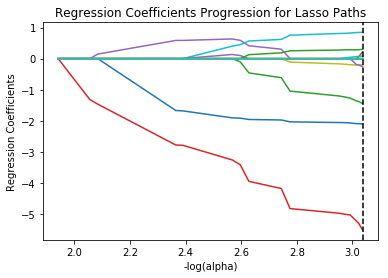

In [11]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


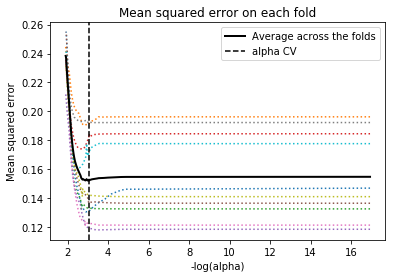

In [12]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [13]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(training_target, model.predict(training_data))
test_error = mean_squared_error(test_target, model.predict(test_data))
print ('training data MSE')
print(train_error)

training data MSE
0.13939067688


In [14]:

print ('test data MSE')
print(test_error)

test data MSE
0.144364004174


In [15]:
# R-square from training and test data
rsquared_train=model.score(training_data, training_target)
rsquared_test=model.score(test_data, test_target)
print ('training data R-square')
print(rsquared_train)

training data R-square
0.413411899041


In [16]:
print ('test data R-square')
print(rsquared_test)

test data R-square
0.415859060493
